In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(9876789)

In [17]:
# OLS estimation

nsample = 1000
x = np.linspace(0, 10, 1000)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [18]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [19]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.310e+07
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:58:46   Log-Likelihood:                -1434.7
No. Observations:                1000   AIC:                             2875.
Df Residuals:                     997   BIC:                             2890.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0222      0.096     10.612      0.0

In [20]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  [1.0221987  0.11315924 9.99762666]
R2:  0.999988433750743


In [21]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [22]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     229.5
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.12e-27
Time:                        00:58:53   Log-Likelihood:                -33.600
No. Observations:                  50   AIC:                             75.20
Df Residuals:                      46   BIC:                             82.85
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4927      0.026     18.973      0.0

In [23]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("Predicted values: ", res.predict())

Parameters:  [ 0.49266628  0.34178285 -0.01938816  5.00522947]
Standard errors:  [0.025967   0.10207932 0.00227992 0.16837099]
Predicted values:  [ 4.52052556  4.93318102  5.3170876   5.65361842  5.93086896  6.14561292
  6.30383228  6.41973448  6.5134182   6.60757119  6.72374273  6.87880315
  7.08217208  7.33427084  7.62645321  7.94242599  8.26092591  8.55921313
  8.81680734  9.01885262  9.15855822  9.23831423  9.26929895  9.2696423
  9.26144712  9.26715774  9.30587245  9.39020569  9.52421554  9.70273699
  9.91223055 10.13300671 10.34246092 10.51878742 10.64456187 10.70960414
 10.71265084 10.66156293 10.57203417 10.46501266 10.36325916 10.28760754
 10.25354186 10.26865233 10.33138832 10.43131309 10.55081852 10.66801808
 10.76034274 10.80824895]


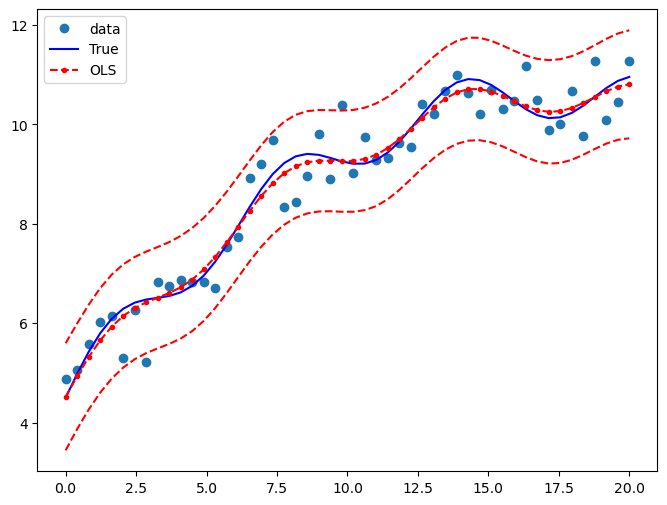

In [24]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc="best")

In [25]:
# OLS with dummy variables

nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
# dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = pd.get_dummies(groups).values
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:, 1:]))
X = sm.add_constant(X, prepend=False)

beta = [1.0, 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [12]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     671.7
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           5.69e-38
Time:                        00:48:25   Log-Likelihood:                -64.643
No. Observations:                  50   AIC:                             137.3
Df Residuals:                      46   BIC:                             144.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9999      0.060     16.689      0.0

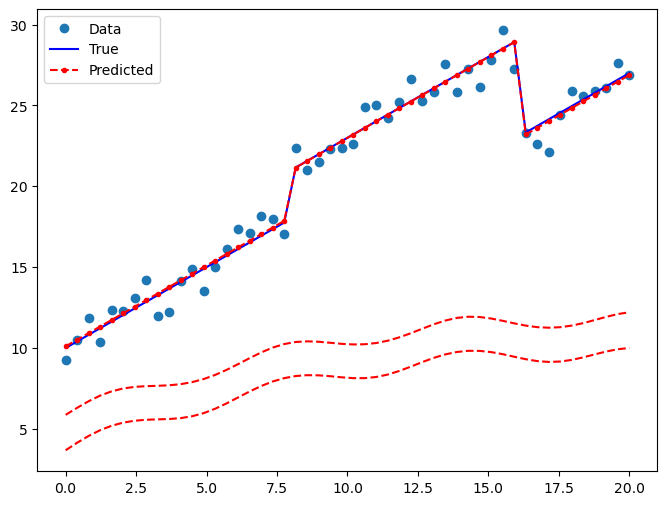

In [13]:
pred_ols2 = res2.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="Data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res2.fittedvalues, "r--.", label="Predicted")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
legend = ax.legend(loc="best")